<center><h1>The Small Open Economy (SOE) RBC Model</h1></center>

<div style="text-align: center;">
  <a href="https://sites.google.com/view/ciroeduardobazannavarro/home" style="font-weight: bold; text-decoration: underline;">Dr. Ciro Eduardo Bazán Navarro</a>
</div>

<center>December 2025</center>

<p style="text-align: justify;">In this notebook, I replicate the numerical results and simulations of the External Debt-Elastic Interest Rate (EDEIR) model developed by Uribe and Schmitt-Grohé (2003, 2017). Although Uribe and Schmitt-Grohé (2003, 2017) provide Matlab-based implementations of several small open economy real business cycle (SOE-RBC) models—including versions with endogenous interest-rate premia—I focus here exclusively on the specific EDEIR configuration used in their quantitative exercises.</p> 

<p style="text-align: justify;">The goal of this notebook is to produce a transparent Dynare-based implementation of the EDEIR model and to reproduce its steady state, impulse responses, and stochastic simulations. Unlike the Matlab implementations by Uribe and Schmitt-Grohé (2003, 2017)—which specify the equilibrium conditions in nonlinear levels and then obtain the linear approximation numerically—my Dynare code inputs the analytically linearized model directly. I also compare my Dynare implementation with the influential Dynare code developed by Pfeifer, who writes the SOE-RBC model in nonlinear form and relies on Dynare’s internal linearization routines.</p>

<p style="text-align: justify;">Despite methodological differences—analytical versus automatic linearization—both approaches generate results consistent with the benchmark findings in Uribe and Schmitt-Grohé (2003, 2017). This confirms the robustness of the EDEIR framework and highlights Dynare’s reliability for replicating canonical models in international macroeconomics.</p>

<div class="alert alert-block alert-info">
  <b>Note 01.</b>
  <p style="text-align: justify; margin-top: 8px;">
    For reference, the broader collection of small open economy (SOE–RBC) models and replication files by
    Uribe and Schmitt-Grohé (2003, 2017) is available at the following link:
  </p>
  <p style="margin-left: 15px;">
    <a href="https://www.columbia.edu/~mu2166/closing.htm" target="_blank">
      https://www.columbia.edu/~mu2166/closing.htm
    </a>
  </p>
  <hr style="margin: 10px 0;">
  <p style="text-align: justify;">
    Additionally, Pfeifer’s Dynare implementation of the small open economy model of
    Uribe and Schmitt-Grohé (2003) can be downloaded from:
  </p>
  <p style="margin-left: 15px;">
    <a href="https://github.com/JohannesPfeifer/DSGE_mod/blob/master/SGU_2003/SGU_2003.mod" target="_blank">
      https://github.com/JohannesPfeifer/DSGE_mod/blob/master/SGU_2003/SGU_2003.mod
    </a>
  </p>
</div>

## Model Assumptions 


### Centralized solution
### The economy: 

* <p style="text-align: justify;">The economy is inhabited by an infinite number of identical households that face fluctuations in their income. It is a small open economy with no transfers, taxes, or government spending. It is an exchange economy—there is no money, and therefore no issues related to exchange rates.</p>

* <p style="text-align: justify;">There are capital adjustment costs, and the interest rate at which domestic agents borrow from the rest of the world is constant. Domestic households have access to a single risk-free international bond (“incomplete international asset markets”). Access to the international asset market allows the economy to smooth consumption in the face of uncertainty in domestic income. This contrasts with a framework in which agents can trade a full set of state-contingent assets (“complete markets”) (Lubik, 2007). Agents do not face frictions when adjusting the size of their asset portfolios.</p> 

### The households:

* <p style="text-align: justify;">In this economy, the representative household consumes and produces BB & SS, invests in physical capital, and borrows from the rest of the world through the international asset market.</p>

* <p style="text-align: justify;">Production, employment, and the use of physical capital all take place within the representative household.</p>

* <p style="text-align: justify;">The household’s utility function is assumed to be of the GHH form (Greenwood, Hercowitz, and Huffman, 1988) because, as will be shown later, it makes labor supply (the marginal rate of substitution between consumption and leisure) independent of the consumption level, and because this class of utility functions is appealing from an empirical standpoint.</p>

* <p style="text-align: justify;">The representative household’s preferences, denoted by $U$—that is, the expected value of the sum of current utility and discounted future utility flows—are given by:</p>
$$
U=E_0\sum_{t=0}^{\infty}{\beta^tu\left(c_t,h_t\right)=E_0\sum_{t=0}^{\infty}{\beta^t\left[\frac{\left(c_t-\frac{h_t^\omega}{\omega}\right)^{1-\sigma}-1}{1-\sigma}\right]}};\sigma>0,\ \omega>1,\beta\in\left(0,1\right) \tag{1}
$$
<p style="text-align: justify;">Where $E_t(\cdot)$ denotes the mathematical expectations conditioned on the information available at period $t$, and $\beta$ is the constant subjective intertemporal discount factor. The utility $u(c_t, h_t)$ of the representative household depends on consumption $c_t$ and labor supply $h_t$ in period $t$, with the following properties: $u_c>0$, $u_h<0$, $u_{cc}<0$, $u_{hh}<0$, and $u_{cc} u_{hh} > u_{ch}^2$. The utility function of the representative household, of the GHH type, exhibits relative risk aversion with respect to the consumption-labor composite index  $G(c_t, h_t) = c_t - \frac{h_t^\omega}{\omega},$ where $\sigma$ measures the degree of relative risk aversion, $1/\sigma$ represents the intertemporal elasticity of substitution, and $1/(\omega-1)$ corresponds to the elasticity of labor supply with respect to the real wage. The parameter $\sigma$ also captures the degree of relative risk aversion.</p>
The period-by-period budget constraint of the representative household takes the following form:
$$ 
d_t={(1+r_{t-1})d}_{t-1}{-y}_t+c_t+i_t+\Phi\left({k_{t+1}-k}_t\right)={(1+r_{t-1})d}_{t-1}{-y}_t+c_t+i_t+\frac{\emptyset}{2}\left({k_{t+1}-k}_t\right)^2\tag{2} 
$$
<p style="text-align: justify;">Where $d_t$ represents the household debt at the end of period $t$, $c_t$ is consumption, $i_t$ is gross investment, and $k_t$ is the stock of physical capital. The interest rate at which domestic households can borrow from the rest of the world is denoted by $r_t$. $y_t$ denotes domestic output. The function $\Phi(\cdot)$ captures capital adjustment costs and satisfies: $\Phi(0) = \Phi'(0) = 0 \quad \text{and} \quad \Phi''(0) > 0$. These conditions ensure that, in the steady state, capital adjustment costs are zero and that the relative price of capital goods in terms of consumption goods is unity. Capital adjustment costs are included to prevent excessive volatility in $i_t$ in response to changes in the marginal productivity of capital. Finally, $1/\sigma$ represents a measure of intertemporal substitution elasticity, while $1/(\omega - 1)$ measures 
The law of movement of the capital stock (with depreciation rate “𝛿”) is given by:
$$
k_{t+1}=\left(1-\delta\right)k_t+ i_t, \ \ \delta\in\left(0,1\right)\tag{3}
$$
<p style="text-align: justify;">Product $y_t$ is produced by a production function that uses physical capital and labor as inputs. The technology used by the representative household to produce a quantity $y_t$ of goods and services in period $t$ is of the Cobb-Douglas type:</p>
$$
y_t=A_tF\left(k_t,h_t\right)=A_tk_t^\alpha h_t^{1-\alpha},\ \ \alpha\in\left(0,1\right)\tag{4}
$$
<p style="text-align: justify;">Where $𝐴_𝑡$ is the total factor productivity (TFP) that represents the aggregate level of efficiency in production, $𝛼$ is the partial elasticity of production with respect to capital, $1−𝛼$ is the partial elasticity of production with respect to labor.</p>
<p style="text-align: justify;">It is also assumed that the production function satisfies the following properties: $F_k > 0$, $F_h > 0$, $F_{kk} < 0$, $F_{hh} < 0$, $F(k_t, h_t) = b y_t = F(b k_t, b h_t)$ with $b > 0$, $\lim_{k \to 0} F_k \to +\infty$, $\lim_{k \to \infty} F_k = 0$, $\lim_{h \to 0} F_h \to +\infty$, $\lim_{h \to \infty} F_h = 0.$</p>    
<p style="text-align: justify;">To rule out the possibility that the representative household could borrow indefinitely and roll over its debt forever (i.e., engage in Ponzi schemes), I assume that the representative household faces a natural debt limit. Households are subject to the following sequence of borrowing constraints, which prevent participation in Ponzi games (No-Ponzi Game Condition):</p>
$$
\lim_{j \to \infty} E_t\left[\frac{d_{t+j}}{\prod_{s=0}^{j}\left(1+r_s\right)}\right] = 0\tag{5}
$$
<p style="text-align: justify;">Households choose the sequences $\{c_t, i_t, y_t, h_t, k_{t+1}, d_t\}_{t=0}^{\infty}$ to maximize the utility function $U$ given by (1), subject to constraints (2), (3), (4), and (5).</p>
Substituting (3), (4) into (2) results in:
$$
d_t = (1 + r_{t-1}) d_{t-1} - A_t k_t^\alpha h_t^{1-\alpha} + c_t + k_{t+1} - (1-\delta) k_t + \frac{\phi}{2} (k_{t+1} - k_t)^2 \tag{6}
$$
The dynamic Lagrangian corresponding to the representative household optimization problem is:
$$
\begin{aligned}
\max_{\{d_t, c_t, h_t, k_{t+1}, \mu_t\}} 
\mathbb{E}_0 \sum_{t=0}^{\infty} \beta^t 
\Bigg[
& \frac{\left(c_t-\frac{h_t^\omega}{\omega}\right)^{1-\sigma}-1}{1-\sigma}  \\
& + \mu_t \Big( d_t - (1 + r_{t-1}) d_{t-1}
+ A_t k_t^\alpha h_t^{1-\alpha}
- c_t - k_{t+1} + (1-\delta)k_t
- \frac{\phi}{2} (k_{t+1}-k_t)^2 \Big)
\Bigg]
\end{aligned}
\tag{7}
$$
<p style="text-align: justify;">Where $β^t μ_t$ is the Lagrange multiplier [present value of the marginal utility of consumption according to (10)] associated with the budget constraint of period $𝑡$.</p>
The first-order conditions are given by:
$$
\frac{\partial\mathcal{L}}{\partial d_t}=\beta^t\left\{\mu_t-\beta(1+r_t)E_t\left[\mu_{t+1}\right]\right\}=0\leftrightarrow\mu_t=\beta(1+r_t)E_t\left[\mu_{t+1}\right]\tag{8}
$$
$$
\frac{\partial\mathcal{L}}{\partial c_t}=\beta^t\left[u_c(c_t,h_t)-\mu_t\right]=\beta^t\left[\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}-\mu_t\right]=0\leftrightarrow\mu_t=u_c(c_t,h_t)=\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}\tag{9}
$$
\begin{equation*} 
\begin{aligned} 
& \frac{\partial\mathcal{L}}{\partial h_t}=\beta^t\left[u_h(c_t,h_t)+\mu_tA_tF_h(k_t,h_t)\right]=\beta^t\left[{-\left(c_t-\frac{h_t^\omega}{\omega}\right)}^{-\sigma}h_t^{\omega-1}+{\left(1-\alpha\right)\mu}_tA_tk_t^\alpha h_t^{-\alpha}\right]=0 \\ 
& \leftrightarrow{\left(c_t-\frac{h_t^\omega}{\omega}\right)}^{-\sigma}h_t^{\omega-1}={\left(1-\alpha\right)\mu}_tA_tk_t^\alpha h_t^{-\alpha}
\end{aligned}%
\tag{10}
\end{equation*} 
$$
\frac{\partial\mathcal{L}}{\partial k_{t+1}}=-\beta^t\mu_t[1+Φ´(k_{t+1}-k_t)]+β^{t+1}E_t\Big[μ_{t+1}[A_{t+1}F_{k}(k_{t+1},h_{t+1})+1-δ+Φ´(k_{t+2}-k_{t+1})]\Big]=0
$$
$$
\mu_t[1+Φ´(k_{t+1}-k_t)]=βE_t\Big[μ_{t+1}[A_{t+1}F_{k}(k_{t+1},h_{t+1})+1-δ+Φ´(k_{t+2}-k_{t+1})]\Big]
$$
From equation (2), taking into account that $\Phi\left({k_{t+1}-k}_t\right)=\frac{\emptyset}{2}\left({k_{t+1}-k}_t\right)^2$:
$$
\mu_t[1+\emptyset(k_{t+1}-k_t)]=βE_t\Big[μ_{t+1}[A_{t+1}F_{k}(k_{t+1},h_{t+1})+1-δ+\emptyset(k_{t+2}-k_{t+1})]\Big]\tag{11}
$$
$$
\frac{\partial\mathcal{L}}{\partial\mu_t}=\beta^t\left[d_t-{(1+r_{t-1})d}_{t-1}+A_tk_t^\alpha h_t^{1-\alpha}-c_t-k_{t+1}+\left(1-\delta\right)k_t-\frac{\emptyset}{2}\left({k_{t+1}-k}_t\right)^2\right]=0
$$
$$
A_tk_t^\alpha h_t^{1-\alpha} +\left(1-\delta\right)k_t+ d_t\ = c_t+ {(1+r_{t-1})d}_{t-1}+k_{t+1}+ \frac{\emptyset}{2}\left({k_{t+1}-k}_t\right)^2\tag{12}
$$
Replacing (9) in (10) yields the intratemporal optimality condition (the labor supply):
$$
-\frac{u_h(c_t,h_t)}{u_c(c_t,h_t)}=A_tF_{h_t}\rightarrow\frac{\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}h_t^{\omega-1}}{\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}}=A_t(1-\alpha)k_t^\alpha h_t^{-\alpha}\rightarrow h_t^{\omega-1}=A_t(1-\alpha)k_t^\alpha h_t^{-\alpha}\tag{13}
$$
<p style="text-align: justify;">The representative household’s labor–supply condition states that the (absolute) marginal rate of substitution between leisure/labor and consumption —which rises with hours worked when consumption is held constant— must equal the marginal product of labor (i.e., labor demand, the real wage in the decentralized equilibrium), which falls as hours worked increase while the capital stock is kept constant.</p>
* <p style="text-align: justify;">The variable $A_t$ is taken to be the sole driver of aggregate fluctuations in the model. 
Its long-run growth component is ignored, and it is assumed to follow a first-order autoregressive process:</p>
$$
ln(A_t)=\rho ln(A_{t-1})+\eta\varepsilon_t,\ \ \rho\in\left(-1,1\right)\tag{14}
$$
<p style="text-align: justify;">Where $\rho$ governs the serial autocorrelation of $A_t$, and $\varepsilon_t$ are white-noise innovations (exogenous and stochastic technology shocks), Gaussian, independent, and identically distributed such that:</p>
$$
\mathbb{E}_t(\varepsilon_t) = 0,\qquad
\mathbb{E}_t(\varepsilon_t,\, \varepsilon_m) =
\begin{cases}
\sigma_{\varepsilon}^2, & \text{if } t = m,\\[6pt]
0, & \text{if } t \ne m.
\end{cases}         
$$
<p style="text-align: justify;">According to equation (14), the conditional expectation of next period’s productivity shock—given the information available at time \( t \)—is equal to a fraction \( \rho \) of the current productivity disturbance:</p>
$$
E_t\left[ln\left(A_{t+1}\right)\right]=\rho ln(A_t)\tag{15}
$$
<p style="text-align: justify;">More broadly, under the assumed AR(1) structure of the productivity shock, its expected value $j$ periods ahead, conditional on information available today, equals a fraction $\rho^{\,j}$ of its current value.</p>
$$
E_t\left[ln\left(A_{t+j}\right)\right]=\rho^j ln(A_t)\tag{16}
$$
* <p style="text-align: justify;">It is assumed that the interest rate faced by domestic agents, $r_t$, rises with the economy’s cross-sectional average level of external debt, denoted by $\widetilde{d_t}$. Formally, the interest rate is given by:</p>  
$$ 
r_t=r^o+p\left(\widetilde{d_t}\right)\tag{17}
$$
<p style="text-align: justify;">Where $r^o$ is the constant world interest rate and $p(\cdot)$ represents a country-specific interest rate premium. Households take the path of $\widetilde{d_t}$ as exogenously determined. For simplicity, the world interest rate $r^o$ is assumed to be constant, and the premium function $p(\cdot)$ is taken to be strictly increasing. As will be shown shortly, assuming a debt-elastic interest rate premium guarantees that the model possesses a steady state independent of initial conditions. Moreover, this assumption ensures that a first-order approximation of the equilibrium dynamics converges to the exact (nonlinear) dynamics as the magnitude of the underlying shocks becomes small.</p>

* Following to Schmitt-Grohé and Uribe (2003), the country’s interest-rate premium is given by:
$$
p\left(\widetilde{d_t}\right)=\psi_1\left(e^{\widetilde{d_t}-\bar{d}}-1\right)\tag{18}
$$
<p style="text-align: justify;">Where $\psi_1 > 0$ and $\bar{d}$ are parameters. Under this specification, the country risk premium is an increasing and convex function of net external debt.</p>  


## Rational Expectations Equilibrium
<p style="text-align: justify;">Because all agents are assumed to be identical, in equilibrium the average level of debt across agents must coincide with each agent’s individual debt level, that is:</p>
$$
\widetilde{d_t}=d_t\tag{19}
$$
Substituting (18) into (17) and taking into account (19): 
$$
r_t=r^o+p\left({d_{t}}\right)=r^o+\psi_1\left(e^{d_{t}-\bar{d}}-1\right)\tag{20}
$$
Substituting (20) into (6): 
$$
d_t = \left[1 + r^o+\psi_1\left(e^{d_{t-1}-\bar{d}}-1\right)\right] d_{t-1} - A_t k_t^\alpha h_t^{1-\alpha} + c_t + k_{t+1} - (1-\delta) k_t + \frac{\phi}{2} (k_{t+1} - k_t)^2 \tag{21}
$$
Replacing equation (9) into (8) yields the Euler equation for the optimal intertemporal allocation of consumption:
$$
u_c(c_t,h_t)=\beta(1+r_{t})E_t\Big[u_c{(c_{t+1},h_{t+1})}\Big]\rightarrow\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}=\beta(1+r_{t})E_t\left[\left(c_{t+1}-\frac{h_{t+1}^\omega}{\omega}\right)^{-\sigma}\right]\tag{22}
$$
<p style="text-align: justify;">The Euler equation states that, at the margin, the representative household is willing to give up one unit of current consumption—valued at its marginal utility—if it is compensated with an additional unit of consumption in the next period, adjusted by the relevant (discounted) interest rate and evaluated according to its uncertain contribution to utility (Lubik, 2007).</p>

Substituting (20) into (22): 
$$
u_c(c_t,h_t)=\beta\left[1+r^o+p\left({d_{t}}\right)\right]E_t\Big[u_c{(c_{t+1},h_{t+1})}\Big]
$$

$$
\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}=\beta\left[1+r^o+\psi_1\left(e^{d_{t}-\bar{d}}-1\right)\right]E_t\left[\left(c_{t+1}-\frac{h_{t+1}^\omega}{\omega}\right)^{-\sigma}\right]\tag{23}
$$

Replacing (9) in (11) gives the following expression:
$$
\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}\ \left[1+\emptyset\left(k_{t+1}-k_t\right)\right]=\beta E_t\left\{\left(c_{t+1}-\frac{h_{t+1}^\omega}{\omega}\right)^{-\sigma}\left[A_{t+1}\alpha k_{t+1}^{\alpha-1}h_{t+1}^{1-\alpha}+1-\delta+\emptyset\left(k_{t+2}-k_{t+1}\right)\right]\right\}\tag{24}
$$

Substituting (20) into (5): 
$$
\lim_{j \to \infty} E_t\left[\frac{d_{t+j}}{\prod_{s=0}^{j}\left[1+r^o+p\left({d_{s}}\right)\right]}\right] =\lim_{j \to \infty} E_t\left[\frac{d_{t+j}}{\prod_{s=0}^{j}\left[r^o+\psi_1\left(e^{d_{s}-\bar{d}}-1\right)\right]}\right]= 0\tag{25}
$$

<p style="text-align: justify;">A rational expectations equilibrium in this centralized economy is defined as a sequence of processes $\left\{ d_t , c_t, h_t, k_{t+1}, A_t  \right\}_{t=0}^{\infty}$ that satisfy equations (13), (14), (21), (23), (24), and (25), given the initial condition $d_{−1}$, $A_0$, $k_0$, and the exogenous sequence $\left\{\varepsilon_t \right\}_{t=0}^{\infty}$.</p>

<p style="text-align: justify;">Given the equilibrium paths of consumption, labor, capital, and debt, investment can be obtained from equation (3), output from equation (4), and the interest rate from equation (20). With these components, one can then construct the equilibrium path of the trade balance $tb_t$ using the market-clearing condition for the domestic goods and services market under zero government spending:</p>

$$
y_t=c_t+i_t+ \frac{\emptyset}{2}\left({k_{t+1}-k}_t\right)^2\ + {tb}_t
$$
$$
{tb}_t= y_t-c_t-i_t- \frac{\emptyset}{2}\left({k_{t+1}-k}_t\right)^2\tag{26}
$$
<p style="text-align: justify;">Additionally, the current account $ca_t$ can be computed as the difference between the trade balance and the interest payments on the previous period’s external debt, or equivalently as the (absolute) change in the country’s external debt:
</p>

$$
ca_t=tb_t-r_{t-1}d_{t-1}=d_{t-1}-d_t\tag{27}
$$

<div class="alert alert-block alert-info">
<b>Note 02:</b> <p style="text-align: justify;"> The non-linear model can be summarised as follows:
    
\begin{equation}
\left\{
\begin{aligned}
& h_t^{\omega-1}=A_t(1-\alpha)k_t^\alpha h_t^{-\alpha}\\
&d_t = \left[1 + r^o+\psi_1\left(e^{d_{t-1}-\bar{d}}-1\right)\right] d_{t-1} - A_t k_t^\alpha h_t^{1-\alpha} + c_t + k_{t+1} - (1-\delta) k_t + \frac{\phi}{2} (k_{t+1} - k_t)^2 \\
&\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}=\beta\left[1+r^o+\psi_1\left(e^{d_{t}-\bar{d}}-1\right)\right]E_t\left[\left(c_{t+1}-\frac{h_{t+1}^\omega}{\omega}\right)^{-\sigma}\right]\\
&\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}\ \left[1+\emptyset\left(k_{t+1}-k_t\right)\right]=\beta E_t\left\{\left(c_{t+1}-\frac{h_{t+1}^\omega}{\omega}\right)^{-\sigma}\left[A_{t+1}\alpha k_{t+1}^{\alpha-1}h_{t+1}^{1-\alpha}+1-\delta+\emptyset\left(k_{t+2}-k_{t+1}\right)\right]\right\}\\
&{\rm lnA}_t={\rho lnA}_{t-1}+\eta\varepsilon_t\\
&y_t=A_tk_t^\alpha h_t^{1-\alpha}\\
&i_t=k_{t+1}-\left(1-\delta\right)k_t\\
&ca_t=tb_t-r_{t-1}d_{t-1}= d_{t-1}- d_t\\
& {cay}_t=\frac{{ca}_t}{y_t}\\
&r_t=r^o+p\left({d_{t}}\right)=r^o+\psi_1\left(e^{d_{t}-\bar{d}}-1\right)\\
&{tb}_t= y_t-c_t-i_t- \frac{\emptyset}{2}\left({k_{t+1}-k}_t\right)^2\\
& {tby}_t=\frac{{tb}_t}{y_t}\\
&\lim_{j \to \infty} E_t\left[\frac{d_{t+j}}{\prod_{s=0}^{j}\left[r^o+\psi_1\left(e^{d_{s}-\bar{d}}-1\right)\right]}\right]= 0
\end{aligned}
\right.
\tag{*}
\end{equation}</p>
</div>

## Non-stochastic Steady-State
<p style="text-align: justify;">The deterministic (non-stochastic) steady state corresponds to the model’s equilibrium under two conditions:  
(i) all exogenous shocks are set to zero in the current period and throughout the entire past, and (ii) uncertainty is absent, meaning that agents perfectly foresee that no shocks will occur in the future. Variables written without a time subscript and with the subscript $SS$ represent their steady-state values: $A_{SS}, \; y_{SS}, \; k_{SS}, \; h_{SS}, \; c_{SS}, \; d_{SS}, \; ca_{SS}, \; tb_{SS}.$</p>

From equation (2):

$$ 
d_{SS}={(1+r_{SS})d}_{SS}{-y}_{SS}+c_{SS}+i_{SS}+\frac{\emptyset}{2}\left({k_{SS}-k}_{SS}\right)^2
$$

\begin{equation}
\boxed{%
{r_{SS}d}_{SS}{-y}_{SS}+c_{SS}+i_{SS}=0}\tag{28}
\end{equation}

From equation (3):

$$
k_{SS}=\left(1-\delta\right)k_{SS}+ i_{SS}
$$

\begin{equation}
\boxed{%
i_{SS}=\delta k_{SS}}\tag{29}
\end{equation}


From equation (4):

\begin{equation}
\boxed{%
y_{SS}=A_{SS}k_{SS}^\alpha h_{SS}^{1-\alpha}}\tag{30}
\end{equation}

From equation (13):

$$
h_{SS}^{\omega-1}=A_{SS}(1-\alpha)k_{SS}^\alpha h_{SS}^{-\alpha}\tag{31}
$$

From equation (14), taking into account that in the steady state $\varepsilon_{SS}=0$:

$$
{\rm lnA}_{SS}={\rho lnA}_{SS}+\eta\varepsilon_{SS}={\rho lnA}_{SS}
$$

$$
(1-\rho) \, lnA_{SS}=0
$$

\begin{equation}
\boxed{%
A_{SS}=1}\tag{32}
\end{equation}

From equation (21):

$$
d_{SS} = \left[1 + r^o+\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)\right] d_{SS} - A_{SS} k_{SS}^\alpha h_{SS}^{1-\alpha} + c_{SS} + k_{SS} - (1-\delta) k_{SS} + \frac{\phi}{2} (k_{SS} - k_{SS})^2
$$

$$
d_{SS} = \left[1 + r^o+\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)\right] d_{SS} - A_{SS} k_{SS}^\alpha h_{SS}^{1-\alpha} + c_{SS} +\delta k_{SS}\tag{33} 
$$

From equation (23):

$$
\left(c_{SS}-\frac{h_{SS}^\omega}{\omega}\right)^{-\sigma}=\beta\left[1+r^o+\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)\right]E_t\left[\left(c_{SS}-\frac{h_{{SS}}^\omega}{\omega}\right)^{-\sigma}\right]
$$

$$
\left(c_{SS}-\frac{h_{SS}^\omega}{\omega}\right)^{-\sigma}=\beta\left[1+r^o+\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)\right]\left(c_{SS}-\frac{h_{SS}^\omega}{\omega}\right)^{-\sigma}
$$

$$
1=\beta\left[1+r^o+\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)\right]\tag{34}
$$

For normalization purposes (not to guarantee the stationarity of the model), it is assumed that:

\begin{equation}
\boxed{%
\beta (1+r^o)=1}\tag{35}
\end{equation}

Sustituting equation (32) in (31):

$$
h_{SS}^{\omega-1}=(1-\alpha)k_{SS}^\alpha h_{SS}^{-\alpha}
$$

$$
h_{SS}^{\omega-1}=(1-\alpha)\left(\frac{k_{SS}}{h_{SS}}\right)^\alpha
$$

\begin{equation}
\boxed{%
h_{SS}=\left[(1-\alpha)\kappa^\alpha\right]^\left(\frac{1}{\omega-1}\right)}\tag{36}
\end{equation}

Where $\kappa={k_{SS}}/{h_{SS}}$ is the steady-state capital-labor ratio.

Replacing equation (32) in (33) and taking account that $\kappa={k_{SS}}/{h_{SS}}$:

$$
d_{SS} = \left[1 + r^o+\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)\right] d_{SS} - k_{SS}^\alpha h_{SS}^{1-\alpha} + c_{SS} +\delta k_{SS}
$$

$$
0 = \left[r^o+\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)\right] d_{SS} - \kappa^\alpha h_{SS} + c_{SS} +\delta k_{SS}
$$

$$
c_{SS} = -\left[r^o+\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)\right] d_{SS} + \kappa^\alpha h_{SS} - \delta k_{SS}\tag{37}
$$

Sustituting equation (35) in (34):

$$
0=\beta\psi_1\left(e^{d_{SS}-\bar{d}}-1\right)
$$

\begin{equation}
\boxed{%
d_{SS}=\bar{d}}\tag{38}
\end{equation}

From equation (24), taking into account equation (32) and that $\kappa={k_{SS}}/{h_{SS}}$:

$$
\left(c_{SS}-\frac{h_{SS}^\omega}{\omega}\right)^{-\sigma}=\beta E_t\left[\left(c_{SS}-\frac{h_{SS}^\omega}{\omega}\right)^{-\sigma}\left(\alpha \kappa^{\alpha-1}+1-\delta\right)\right]
$$

$$
\left(c_{SS}-\frac{h_{SS}^\omega}{\omega}\right)^{-\sigma}=\beta \left(c_{SS}-\frac{h_{SS}^\omega}{\omega}\right)^{-\sigma}\left(\alpha \kappa^{\alpha-1}+1-\delta\right)
$$

$$
1=\beta \left(\alpha \kappa^{\alpha-1}+1-\delta\right)
$$

\begin{equation}
\boxed{%
\kappa=\left(\frac{\beta^{-1}+1-\delta}{\alpha}\right)^\left(\frac{1}{1-\alpha}\right)}\tag{39}
\end{equation}

Taking account that $\kappa={k_{SS}}/{h_{SS}}$:

\begin{equation}
\boxed{%8
k_{SS}=\kappa h_{SS}}\tag{40}
\end{equation}

Replacing equation (38) in (37):

\begin{equation}
\boxed{%
c_{SS} = -r^o \bar{d} + \kappa^\alpha h_{SS} - \delta k_{SS}}\tag{41}
\end{equation}


From equation (26):

$$
{tb}_{SS}= y_{SS}-c_{SS}-i_{SS}- \frac{\emptyset}{2}\left({k_{SS}-k}_{SS}\right)^2
$$

\begin{equation}
\boxed{%
{tb}_{SS}= y_{SS}-c_{SS}-i_{SS}}\tag{42}
\end{equation}

From equation (27):


\begin{equation}
\boxed{%
ca_{SS}=tb_{SS}-r_{SS}d_{SS}=\hat d_{SS}-\hat d_{SS}=0}\tag{43}
\end{equation}

From equation (20), taking account equation (38):

\begin{equation}
\boxed{%
r_{SS}=r^o}\tag{44}
\end{equation}

## Linearization of the model
<p style="text-align: justify;">Now the system of difference equations of the non-linear SOE RBC model will be linearized around its steady state in terms of log deviations ${\hat{x}}_t = ({x_t - x_{SS}})/{x_{SS}} \;\approx\; \ln(x_t) - \ln(x_{SS}) \leftrightarrow {x}_{SS}\neq0$, for $x_{t}=y_{t}, c_{t}, h_{t}, k_{t}, A_{t}$, and with respect to  deviations in levels $\hat z_t= z_t - z_{SS}$, for $z_{t}=r_{t}, d_{t}, ca_{t}, tb_{t}$. For a nonlinear function $f$ of several variables, I use one of the following first-order Taylor linearizations around their respective steady states, as appropriate:</p>


$$
f\left({\vec{x}}_t\right) \approx f\left({\vec{x}}^\ast\right)+\frac{\partial f\left({\vec{x}}^\ast\right)}{\partial x_{1t}}\hat x_{1t}{x_1}_{SS} +\cdots+\frac{\partial f\left({\vec{x}}^\ast\right)}{\partial x_{nt}}\hat x_{nt}{x_n}_{SS} \leftrightarrow {x_i}_{ss}\neq0\ \left(i=1,2,\cdots,n\right)
\tag{45}
$$

Where $\vec{x}^{\,*}  = ({x_1}_{SS}, {x_2}_{SS}, \dots, {x_n}_{SS})$ and $x_{it}-x_{iss}=\hat x_{it}{x_i}_{SS}\leftrightarrow {x_i}_{SS}\neq0\ \left(i=1,2,\cdots,n\right)$. 

$$
f(\vec z_t)\approx 
f(\vec z^\ast)
+\frac{\partial f(\vec z^\ast)}{\partial z_{1t}}\,\hat z_{1t}
+\cdots
+\frac{\partial f(\vec z^\ast)}{\partial z_{nt}}\,\hat z_{nt}\tag{46}
$$

Where $\vec{z}^{\,*}  = ({z_1}_{SS}, {z_2}_{SS}, \dots, {z_n}_{SS})$ and $z_{it}-z_{iSS}=\hat z_{it}\left(i=1,2,\cdots,n\right)$.

<p style="text-align: justify;">Also, for $x_{t}=y_{t}, c_{t}, h_{t}, k_{t}, A_{t}$, I also employ Uhlig's (1999) linearization method, which does not require calculating derivatives and is based on specific approximation techniques. In particular, for $\hat{x}_{t} \approx \ln x_{t} - \ln {x}_{SS}$, the following approximation will be employed:</p>

$$
x_t \approx x_{SS}e^{{\hat{x}}_t} \tag{47}
$$

<p style="text-align: justify;">Furthermore, let $y_𝑡$ be a variable such that $\hat y _𝑡$ (its logarithmic deviation from its steady state) is a real number close to zero; then, the following approximations are also valid:</p>

$$
{\hat{x}}_t{\hat{y}}_t\approx0\tag{48}
$$

$$
e^{{\hat{x}}_t+a{\hat{y}}_t}\approx1+{\hat{x}}_t+a{\hat{y}}_t\tag{49}
$$


The equation to linearize is (13):

$$
h_t^{\omega-1}=A_t(1-\alpha)k_t^\alpha h_t^{-\alpha}
$$

Taking into account equation (47):

$$
\left[h_{SS} e^{\hat h_t}\right]^{w-1} \approx A_{SS} e^{\hat A_t}(1-\alpha)\left[k_{SS} e^{\hat k_t}\right]^{\alpha} \left[h_{SS} e^{\hat h_t}\right]^{-\alpha}
$$

$$
h_{SS}^{w-1}e^{(w-1)\hat h_t} \approx \left[(1-\alpha)A_{SS}{k_{SS}}^\alpha {h_{SS}}^{-\alpha}\right]e^{\left(\hat A_t+\alpha\hat k_t-\alpha\hat h_t\right)}
$$


$$
h_{SS}^{w-1}e^{(w-1)\hat h_t} \approx \left[(1-\alpha)A_{SS}\left(\frac{k_{SS}}{h_{SS}}\right)^\alpha \right]e^{\left(\hat A_t+\alpha\hat k_t-\alpha\hat h_t\right)}
$$

Taking into account that $\kappa={k_{SS}}/{h_{SS}}$:

$$
h_{SS}^{w-1}e^{(w-1)\hat h_t} \approx \left[(1-\alpha)A_{SS}\kappa^\alpha \right]e^{\left(\hat A_t+\alpha\hat k_t-\alpha\hat h_t\right)}
$$

Taking into account equations (32) and (36):

$$
e^{(w-1)\hat h_t} \approx e^{\hat A_t+\alpha\hat k_t-\alpha\hat h_t}
$$

$$
\begin{equation}
\boxed{%SS
(\alpha+w-1)\hat h_t \approx \hat A_t+\alpha\hat k_t}\tag{50}
\end{equation}
$$

The equation to linearize is (21): 

$$ 
d_t = \left[1 + r^o+\psi_1\left(e^{d_{t-1}-\bar{d}}-1\right)\right] d_{t-1} - A_t k_t^\alpha h_t^{1-\alpha} + c_t + k_{t+1} - (1-\delta) k_t + \frac{\phi}{2} (k_{t+1} - k_t)^2
$$ 

Taking into account (47) and that $\hat d_t= d_t-d_{SS}=d_t-\bar d$:

$$
\begin{aligned} \hat d_t + \bar d \;\approx\;&\left[1+r^o+\psi_1\!\left(\frac{e^{d_{t-1}}}{e^{\bar d}}-1\right)\right](\hat d_{t-1}+\bar d)- A_{SS}k_{SS}^\alpha h_{SS}^{1-\alpha}\,e^{\big[\hat A_t+\alpha\hat k_t+(1-\alpha)\hat h_t\big]}\\[6pt] &+\,c_{SS}e^{\hat c_t}+ k_{SS}e^{\hat k_{t+1}}-(1-\delta)\,k_{SS}e^{\hat k_t}+\frac{\phi}{2}\big(k_{SS}e^{\hat k_{t+1}}-k_{SS}e^{\hat k_t}\big)^2 \end{aligned}
$$


Taking into account (29), (46) and (49): 

$$ 
\begin{aligned} \hat d_t + \bar d \;\approx\; &\left[1+r^o+\psi_1\!\left(\frac{e^{\bar d}+e^{\bar d}\hat d_{t-1}}{e^{\bar d}}-1\right)\right](\hat d_{t-1}+\bar d)- y_{SS}\big[1+\hat A_t+\alpha\hat k_t+(1-\alpha)\hat h_t\big] \\[6pt] &+ c_{SS}(1+\hat c_t)+ k_{SS}(1+\hat k_{t+1})-(1-\delta)k_{SS}(1+\hat k_t)+ \frac{\phi k_{SS}^2}{2}\,(\hat k_{t+1}-\hat k_t)^2 \end{aligned}
$$

$$ 
\begin{aligned} \hat d_t + \bar d \;\approx\; &\left(1+r^o+\psi_1\hat d_{t-1}\right)(\hat d_{t-1}+\bar d)- y_{SS}\big[1+\hat A_t+\alpha\hat k_t+(1-\alpha)\hat h_t\big]\\[6pt] &+\,c_{SS}(1+\hat c_t)+ k_{SS}(1+\hat k_{t+1})-(1-\delta)k_{SS}(1+\hat k_t)+ \frac{\phi k_{SS}^2}{2}\,\big(\hat k_{t+1}^2 - 2\hat k_{t+1}\hat k_t + \hat k_t^2\big) \end{aligned}
$$

Taking into account (48), the higher-order terms (products of small deviations) are neglecting. Then, $\hat k_{t+1}^2 \approx 0$, $\hat k_{t+1}\hat k_t \approx 0$, $\hat k_t^2 \approx 0$, and $\hat d_{t-1}^2 \approx 0$: 

$$ 
\hat d_t \approx \left(1+r^o\right)\hat d_{t-1} + \bar d r^o + \psi_1 \bar d \hat d_{t-1}-y_{SS} - y_{SS}\left[\hat A_t+\alpha\hat k_t+(1-\alpha)\hat h_t\right]+c_{SS}+c_{SS}\hat c_t+k_{SS}\hat k_{t+1}+\delta k_{SS}-(1-\delta)k_{SS} \hat k_t 
$$

Taking into account (28) and (29): 

$$ 
\hat d_t \approx \left(1+r^o+\psi_1 \bar d\right)\hat d_{t-1} -y_{SS} \left[\hat A_t+\alpha\hat k_t+(1-\alpha)\hat h_t\right]+c_{SS}\hat c_t+k_{SS}\left[\hat k_{t+1}-(1-\delta)\hat k_t\right]
$$

\begin{equation} 
\boxed{% 
\left(\frac{1}{y_{SS}}\right) \hat d_t \approx\left(\frac{1+r^o+\psi_1 \bar d}{y_{SS}}\right) \hat d_{t-1}+\left(\frac{c_{ss}}{y_{SS}}\right) \hat c_t+\left(\frac{k_{SS}}{y_{SS}}\right)\left[\hat k_{t+1}-(1-\delta)\hat k_t \right]-\hat A_t-\alpha\hat k_t-(1-\alpha)\hat h_t} \tag{51} 
\end{equation}


The equation to linearize is (23): 

$$ 
\left(c_t-\frac{h_t^\omega}{\omega}\right)^{-\sigma}=\beta\left[1+r^o+\psi_1\left(e^{d_{t}-\bar{d}}-1\right)\right]E_t\left[\left(c_{t+1}-\frac{h_{t+1}^\omega}{\omega}\right)^{-\sigma}\right] 
$$

Taking into account (45): 

\begin{equation*}
\begin{aligned}
& \left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}
-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat c_t
+ \sigma h_{SS}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat h_t \\
& \approx \beta \left[1+r^o+\psi_1\left(\frac{e^{\bar d}+e^{\bar d}\hat d_{t}}{e^{\bar d}}-1\right)\right]
E_t\Bigg[
\left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}
-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat c_{t+1}
+ \sigma h_{SS}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat h_{t+1}
\Bigg]
\end{aligned}
\end{equation*}


Taking into account (45): 

\begin{equation*} 
\begin{aligned} 
& \left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat c_t + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat h_t \\ 
& \approx \beta \left[1+r^o+\psi_1\left(\frac{e^{\bar d}+e^{\bar d}\hat d_{t}}{e^{\bar d}}-1\right)\right]E_t\left[\left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat c_{t+1} + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat h_{t+1}\right] 
\end{aligned}% 
\end{equation*} 

Dividing by $\left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}>0$: 


Taking into account (45): 

\begin{equation*} 
\begin{aligned} 
& \left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat c_t + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat h_t \\ 
& \approx \beta \left[1+r^o+\psi_1\left(\frac{e^{\bar d}+e^{\bar d}\hat d_{t}}{e^{\bar d}}-1\right)\right]E_t\left[\left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat c_{t+1} + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-\sigma-1}\hat h_{t+1}\right] 
\end{aligned}% 
\end{equation*} 

Dividing by $\left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}>0$: 

\begin{equation*} 
\begin{aligned} 
& 1-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat c_t + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat h_t \\ 
& \approx \beta \left[1+r^o+\psi_1\hat d_t\right] E_t\left[1-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat c_{t+1} + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat h_{t+1}\right] 
\end{aligned}% 
\end{equation*} 

Taking into account equation (35):
 
\begin{equation*} 
\begin{aligned} 
& 1-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat c_t + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat h_t \\ 
& \approx \left(1+\beta\psi_1\hat d_t\right)\left(1-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1} E_t[\hat c_{t+1}] + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat h_{t+1}]\right) 
\end{aligned}% 
\end{equation*} 

Expanding the product on the right-hand side of the approximation symbol: 

\begin{equation*} 
\begin{aligned} & 1-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat c_t + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat h_t \\ 
& \approx 1+\,\beta\psi_1\hat d_t-\sigma\,c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat c_{t+1}] +\sigma\,h_{SS}^w\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat h_{t+1}] \\ 
&\quad -\beta\psi_1 \sigma\,c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat d_t\,E_t[\hat c_{t+1}] +\beta\psi_1 \sigma\,h_{SS}^w\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat d_t\,E_t[\hat h_{t+1}] 
\end{aligned}% 
\end{equation*} 

Neglecting higher-order terms (products of small deviations) such as $\hat d_t E_t[\hat c_{t+1}]$ and $\hat d_t E_t[\hat h_{t+1}]$: 

\begin{equation*} 
\begin{aligned} 
& 1-\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat c_t + \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat h_t \\ & \approx 1+\,\beta\psi_1\hat d_t-\sigma\,c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat c_{t+1}] +\sigma\,h_{SS}^w\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat h_{t+1}] 
\end{aligned}% 
\end{equation*} 

\begin{equation*}
\boxed{
\begin{aligned}
& -\sigma c_{SS}\left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1}\hat c_t
+\sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1}\hat h_t \\
& \qquad \approx \beta \psi_1 \hat d_t
-\sigma c_{SS}\left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1}E_t[\hat c_{t+1}]
+\sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1}E_t[\hat h_{t+1}]
\end{aligned}}
\tag{52}
\end{equation*}


<div class="alert alert-block alert-info"> <b>Note 03:</b> <p style="text-align: justify;"> Since it was assumed that the marginal utility of consumption was strictly positive, $(c_t - h_t^\omega/\omega)^{-\sigma}>0$, in the steady state $c_{ss} - h_{ss}^\omega/\omega > 0$ is verified.</p> 
</div> 

The equation to linearize is (24): 

$$ 
\Big(c_t-\frac{h_t^\omega}{\omega}\Big)^{-\sigma}\Big[1+\varphi(k_{t+1}-k_t)\Big] =\beta E_t\Big\{\Big(c_{t+1}-\frac{h_{t+1}^\omega}{\omega}\Big)^{-\sigma}\Big[A_{t+1}\alpha k_{t+1}^{\alpha-1}h_{t+1}^{1-\alpha}+1-\delta+\varphi(k_{t+2}-k_{t+1})\Big]\Big\} 
$$ 

Taking into account (45) and (47): 

\begin{equation*} 
\begin{aligned} 
& \left[\left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-\sigma} -\sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-\sigma-1} \hat c_t + \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-\sigma-1} \hat h_t\right] \left[ 1 + \phi \left( k_{SS} e^{\hat k_{t+1}} - k_{SS} e^{\hat k_t} \right) \right] \\ 
& \approx \beta E_t \Bigg\{ \Bigg[ \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-\sigma} - \sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-\sigma-1} \hat c_{t+1} + \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-\sigma-1} \hat h_{t+1} \Bigg] \\ 
& \qquad \times \Bigg[ A_{SS} \alpha k_{SS}^{\alpha-1} h_{SS}^{1-\alpha} \, e^{\hat A_{t+1} + (\alpha-1)\hat k_{t+1} + (1-\alpha)\hat h_{t+1}} + 1 - \delta + \phi k_{SS} \left( e^{\hat k_{t+2}} - e^{\hat k_{t+1}} \right) \Bigg] \Bigg\} 
\end{aligned}
\end{equation*}

 Dividing by $\left(c_{SS}-\frac{{h_{SS}}^w}{w}\right)^{-\sigma}>0$: 
\begin{equation*} 
\begin{aligned} 
& \left[1-\sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_t + \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_t\right] \left[ 1 + \phi \left( k_{SS} e^{\hat k_{t+1}} - k_{SS} e^{\hat k_t} \right) \right] \\ 
& \approx \beta E_t \Bigg\{ \Bigg[ 1- \sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_{t+1} + \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_{t+1} \Bigg] \\ & \qquad \times \Bigg[ A_{SS} \alpha k_{SS}^{\alpha-1} h_{SS}^{1-\alpha} \, e^{\hat A_{t+1} + (\alpha-1)\hat k_{t+1} + (1-\alpha)\hat h_{t+1}} + 1 - \delta + \phi k_{SS} \left( e^{\hat k_{t+2}} - e^{\hat k_{t+1}} \right) \Bigg] \Bigg\} 
\end{aligned} 
\end{equation*}

Taking into account (49) and that $A_{SS}=1$ and $\kappa={k_{SS}}/{h_{SS}}$:

\begin{equation*}
\begin{aligned}
& \left[1-\sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_t
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_t\right] 
\left[ 1 + \phi k_{SS} \left(\hat k_{t+1} - \hat k_t \right) \right] \\
& \approx \beta E_t \Bigg\{ 
\Bigg[
1- \sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_{t+1}
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_{t+1}
\Bigg] \\
& \qquad \times 
\Bigg[\alpha \kappa^{\alpha-1} \, [1+\hat A_{t+1} + (\alpha-1)\hat k_{t+1} + (1-\alpha)\hat h_{t+1}]
+ 1 - \delta + \phi k_{SS} \left( \hat k_{t+2} - \hat k_{t+1} \right)\Bigg]\Bigg\}
\end{aligned}
\end{equation*}

Since after sustituting (35) into (39) it turns out that $\alpha \kappa^{\alpha-1}=r^o+\delta$:

\begin{equation*}
\begin{aligned}
& \left[1-\sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_t
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_t\right] 
\left[ 1 + \phi k_{SS} \left(\hat k_{t+1} - \hat k_t \right) \right] \\
& \approx \beta E_t \Bigg\{ 
\Bigg[
1- \sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_{t+1}
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_{t+1}
\Bigg] \\
& \qquad \times 
\Bigg[(r^o+\delta) \, [1+\hat A_{t+1} + (\alpha-1)\hat k_{t+1} + (1-\alpha)\hat h_{t+1}]
+ 1 - \delta + \phi k_{SS} \left( \hat k_{t+2} - \hat k_{t+1} \right)\Bigg]\Bigg\}
\end{aligned}
\end{equation*}

Expanding the product on the left-hand side of the approximation symbol and neglecting higher-order terms (products of small deviations) such as $\hat c_{t}\hat k_{t}$, $\hat c_{t}\hat k_{t+1}$, $\hat h_{t}\hat k_{t+1}$, and $\hat h_{t}\hat k_{t}$:


\begin{equation*}
\begin{aligned}
& 1-\sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_t
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_t\ 
+\phi k_{SS} \left(\hat k_{t+1} - \hat k_t \right) \\
& \approx \beta E_t \Bigg\{ 
\Bigg[
1- \sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_{t+1}
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_{t+1}
\Bigg] \\
& \qquad \times 
\Bigg[(r^o+\delta) \, [1+\hat A_{t+1} + (\alpha-1)\hat k_{t+1} + (1-\alpha)\hat h_{t+1}]
+ 1 - \delta + \phi k_{SS} \left( \hat k_{t+2} - \hat k_{t+1} \right)\Bigg]\Bigg\}
\end{aligned}
\end{equation*}

Expanding the product on the right-hand side of the approximation symbol and neglecting higher-order terms (products of small deviations) such as $\hat c_{t+1}\hat A_{t+1}$, $\hat c_{t+1}\hat k_{t+1}$, $\hat c_{t+1}\hat h_{t+1}$, $\hat c_{t+1}\hat k_{t+2}$, $\hat h_{t+1}\hat A_{t+1}$, $\hat h_{t+1}\hat k_{t+1}$, $\hat h_{t+1}\hat h_{t+1}$, and $\hat h_{t+1}\hat k_{t+2}$:


\begin{equation*}
\begin{aligned}
& 1-\sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_t
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_t\ 
+\phi k_{SS} \left(\hat k_{t+1} - \hat k_t \right) \\
& \approx \beta E_t \Bigg\{(r^o+\delta) \, [1+\hat A_{t+1} + (\alpha-1)\hat k_{t+1} + (1-\alpha)\hat h_{t+1}]
+ 1 - \delta + \phi k_{SS} \left( \hat k_{t+2} - \hat k_{t+1} \right) \\
& \qquad -(1+r^o) \sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_{t+1}
+ (1+r^o)\sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_{t+1}\Bigg\}
\end{aligned}
\end{equation*}


Taking into account (35):


\begin{equation*}
\begin{aligned}
& 1-\sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_t
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_t\ 
+\phi k_{SS} \left(\hat k_{t+1} - \hat k_t \right) \\
& \approx E_t \Bigg\{\left(\frac{r^o+\delta}{1+r^o}\right) \, [1+\hat A_{t+1} + (\alpha-1)\hat k_{t+1} + (1-\alpha)\hat h_{t+1}]
+ \left(\frac{1-\delta}{1+r^o}\right) + \left(\frac{\phi k_{SS}}{1+r^o}\right) \left( \hat k_{t+2} - \hat k_{t+1} \right) \\
& \qquad - \sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_{t+1}
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_{t+1}\Bigg\}
\end{aligned}
\end{equation*}

Simplyfying terms:

\begin{equation*}
\begin{aligned}
& -\sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_t
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_t\ 
+\phi k_{SS} \left(\hat k_{t+1} - \hat k_t \right) \\
& \approx E_t \Bigg\{\left(\frac{r^o+\delta}{1+r^o}\right) \, [\hat A_{t+1} + (\alpha-1)\hat k_{t+1} + (1-\alpha)\hat h_{t+1}]
+ \left(\frac{\phi k_{SS}}{1+r^o}\right) \left( \hat k_{t+2} - \hat k_{t+1} \right) \\
& \qquad - \sigma c_{SS} \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat c_{t+1}
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1} \hat h_{t+1}\Bigg\}
\end{aligned}
\end{equation*}

Finally, extracting expectations:


\begin{equation*}
\boxed{%
\begin{aligned}
& -\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat c_t
+ \sigma h_{ss}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat h_t
+ \phi k_{SS}(\hat k_{t+1}-\hat k_t) \\
& \approx -\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat c_{t+1}]
+ \sigma h_{SS}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat h_{t+1}] \\
& + \left(\frac{r^o+\delta}{1+r^o}\right)E_t[\hat A_{t+1}+(\alpha-1)(\hat k_{t+1}-\hat h_{t+1})]
+ \left(\frac{\phi k_{SS}}{1+r^o}\right)E_t[\hat k_{t+2}-\hat k_{t+1}]
\end{aligned}%
}\tag{53}
\end{equation*}


The equation to linearizate is (14):

$$
ln(A_t)=\rho ln(A_{t-1})+\eta\varepsilon_t
$$

Let $\hat A_t$ denote the log deviation of $A_t$ from its steady state, $\hat A_t = ln(A_t) - \ln (A_{SS})$.  Since, according to equation (31), $Ass=1$ $\left[\ln (A_{SS})=0\right]$:

$$
{\hat{A}}_t  =\ln(A_t)  
$$

Then, in $t-1$:

$$
{\hat{A}}_{t-1} = \ln(A_{t-1})  
$$

Sustituting $ln(A_t)$ and $ln(A_{t-1})$ in equation (14):

\begin{equation}
\boxed{%
\hat A_t = \rho \hat A_{t-1} + \eta{\varepsilon_t}}\tag{54}
\end{equation}



The equation to linearizate is (4):

$$
y_t=A_tk_t^\alpha h_t^{1-\alpha}
$$

Taking account equation (45):

$$
y_{SS}+y_{SS}\hat y_t \approx \left(A_{SS}k_{SS}^\alpha h_{SS}^{1-\alpha}\right) + k_{SS}^\alpha h_{SS}^{1-\alpha}A_{SS}\hat A_t+A_{SS}\alpha k_{SS}^{\alpha-1}h_{SS}^{1-\alpha}k_{SS}\hat k_t+A_{SS}k_{SS}^{\alpha} (1-\alpha) h_{SS}^{-\alpha}h_{SS}\hat h_t
$$

$$
y_{SS}+y_{SS}\hat y_t \approx \left(A_{SS}k_{SS}^\alpha h_{SS}^{1-\alpha}\right) + \left(A_{SS}k_{SS}^\alpha h_{SS}^{1-\alpha}\right) \hat A_t+\alpha \left(A_{SS}k_{SS}^\alpha h_{SS}^{1-\alpha}\right)\hat k_t+(1-\alpha) \left(A_{SS}k_{SS}^\alpha h_{SS}^{1-\alpha}\right)\hat h_t
$$

Taking into account equation (29):

$$
y_{SS}+y_{SS}\hat y_t  \approx y_{SS}+ y_{SS}\hat A_t+\alpha y_{SS}\hat k_t+ (1-\alpha) y_{SS}\hat h_t
$$

\begin{equation}
\boxed{%
\hat y_t \approx \hat A_t + \alpha \hat k_t + (1-\alpha) \hat h_t}\tag{55}
\end{equation}



The equation to linearizate is (3):

$$
k_{t+1}=\left(1-\delta\right)k_t+ i_t
$$

Taking into account (47):

$$
k_{SS}e^{{\hat{k}}_{t+1}} \approx \left(1-\delta\right)k_{SS}e^{{\hat{k}}_t}+ i_{SS}e^{{\hat{i}}_t}
$$

Taking into account (49):

$$
k_{SS}(1+\hat k_{t+1}) \approx \left(1-\delta\right)k_{SS}(1+\hat k_t)+ i_{SS}(1+\hat i_t)
$$

$$
k_{SS} + k_{SS} \hat k_{t+1} \approx (1-\delta) k_{SS} + \left(1-\delta\right)k_{SS} \hat k_t + i_{SS}+ i_{SS} \hat i_t
$$

$$
k_{SS} \hat k_{t+1} \approx -\delta k_{SS} + \left(1-\delta\right)k_{SS} \hat k_t + i_{SS}+ i_{SS} \hat i_t
$$

Taking into account (28):

$$
k_{SS} \hat k_{t+1} \approx -\delta k_{SS} + \left(1-\delta\right)k_{SS} \hat k_t + \delta k_{SS}+ \delta k_{SS} \hat i_t
$$

$$
k_{SS} \hat k_{t+1} \approx  \left(1-\delta\right)k_{SS} \hat k_t + \delta k_{SS} \hat i_t
$$

$$
\hat k_{t+1} \approx  \left(1-\delta\right) \hat k_t + \delta\hat i_t
$$

\begin{equation}
\boxed{%
\hat i_t \approx \frac{\hat k_{t+1}-(1-\delta)\hat k_t}{\delta}}\tag{56}
\end{equation}



The equation to linearizate is (27):

$$
ca_t=d_{t-1}-d_t
$$

Taking into account that $\hat {ca}_t={ca}_t-ca_{SS}$ and that $\hat d_t= d_t - d_{SS}= d_t - \bar{d}$:

$$
ca_{SS}+ \hat {ca}_t \approx  d_{SS} + \hat d_{t-1}-d_{SS}-\hat d_{t}
$$

Taking into account equation (43):

\begin{equation}
\boxed{%
\hat {ca}_t \approx \hat d_{t-1}-\hat d_{t}}\tag{57}
\end{equation}



The equation to linearizate is the current-account-to-output ratio, which is given by:

$$
{cay}_t=\frac{{ca}_t}{y_{t}}={ca}_t{y_{t}}^{-1}
$$

In the steady state, taking into account that ${ca}_{SS}$=0 (eq. 43):

$$
{cay}_{SS}=\frac{{ca}_{SS}}{y_{SS}}=0
$$

Taking into account that $\hat {cay}_t= {cay}_t - {cay}_{SS}$ and the equation (46), the linearization of the current-account-to-output ratio ${cay}_t={ca}_t{y_{t}}^{-1}$ is given by:

$$
{cay}_{SS} + \hat{cay}_t \approx 
\frac{{ca}_{SS}}{y_{SS}}+\left(\frac{1}{y_{SS}}\right)\hat{ca}_t 
- 
\left(\frac{ca_{SS}}{y_{SS}^2}\right)\hat{y}_t  
$$

Taking into account that ${ca}_{SS}={cay}_{SS}=0$:

\begin{equation}
\boxed{%
\hat {cay}_t \approx \frac{\hat {ca}_t}{y_{SS}}}\tag{58}
\end{equation}



The equation to linearizate is (20):

$$
r_t=r^o+p\left({d_{t}}\right)=r^o+\psi_1\left(e^{d_{t}-\bar{d}}-1\right)
$$

Taking into account that $\hat r_t= r_t - r_{SS}= r_t - r^o$:

$$
\hat r_t=r_t-r^o=p\left({d_{t}}\right)=\psi_1\left(e^{d_t - \bar{d}}-1\right)=\psi_1\left(\frac{e^{d_t}}{e^{\bar{d}}}-1\right)
$$

Taking into account (46) and that  $\hat d_t= d_t - d_{SS}= d_t - \bar{d}$:

$$
\hat r_t = p(d_t) 
\approx \psi_1\!\left( \frac{e^{\bar d} + e^{\bar d }\hat d_t}{e^{\bar d}} - 1 \right) 
$$

\begin{equation}
\boxed{%
\hat r_t = p\left({d_{t}}\right)\approx \psi_1 \hat d_t}\tag{59}
\end{equation}



The equation to linearizate is (27):

$$
ca_t=tb_t-r_{t-1}d_{t-1}
$$

Taking into account (46) and that $\hat {ca}_t={ca}_t-ca_{SS}$ and that $\hat {tb}_t= {tb}_t - {tb}_{SS}$:

$$
ca_{SS}+ \hat {ca}_t \approx  {tb}_{SS} + \hat {tb}_t-\left(r_{SS}d_{SS}+d_{SS}\hat r_{t-1}+r_{SS}\hat d_{t-1}\right)
$$

Taking into account (43):

$$
\hat {ca}_t \approx  \hat {tb}_t-\left(d_{SS}\hat r_{t-1}+r_{SS}\hat d_{t-1}\right)
$$

Sustitutiing equations (44) and (57):

$$
\hat d_{t-1}-\hat d_{t} \approx  \hat {tb}_t-d_{SS}\hat r_{t-1}-r^o\hat d_{t-1}
$$

\begin{equation}
\boxed{%
\hat {tb}_t \approx (1+r^o)\hat d_{t-1}-\hat d_t + d_{SS} \hat r_{t-1}}\tag{60}
\end{equation}



The equation to linearizate is the trade-balance-to-output ratio, which is given by:

$$
{tby}_t=\frac{{tb}_t}{y_{t}}={tb}_t{y_{t}}^{-1}
$$

In the steady state:

$$
{tby}_{SS}=\frac{{tb}_{SS}}{y_{SS}}$$

Taking into account that $\hat {tby}_t= {tby}_t - {tby}_{SS}$ and the equation (46), the linearization of the trade-balance-to-output ratio ${tby}_t={tb}_t{y_{t}}^{-1}$ is given by:

$$
{tby}_{ss} + \hat{tby}_t \approx 
\frac{{tb}_{SS}}{y_{SS}}+\left(\frac{1}{y_{SS}}\right)\hat{tb}_t 
- \left(\frac{tb_{SS}}{y_{SS}^2}\right)\hat{y}_t  
$$


Taking into account that ${tby}_{SS}={{tb}_{SS}}/{y_{SS}}$:


\begin{equation}
\boxed{%
\hat {tby}_t \approx \frac{\hat {tb}_t-\left(\frac{{tb}_{SS}}{y_{SS}}\right) \hat y_t}{y_{SS}}}\tag{61}
\end{equation}

<div class="alert alert-block alert-info">
<b>Note 04:</b> <p style="text-align: justify;"> The linearized model can be summarised as follows:
    
\begin{equation}
\left\{
\begin{aligned}
& (\alpha+w-1)\hat h_t \approx \hat A_t+\alpha\hat k_t\\
&\left(\frac{1}{y_{SS}}\right) \hat d_t \approx\left(\frac{1+r^o+\psi_1 \bar d}{y_{SS}}\right) \hat d_{t-1}+\left(\frac{c_{ss}}{y_{SS}}\right) \hat c_t+\left(\frac{k_{SS}}{y_{SS}}\right)\left[\hat k_{t+1}-(1-\delta)\hat k_t\right]-\hat A_t-\alpha\hat k_t-(1-\alpha)\hat h_t\\
& -\sigma c_{SS}\left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1}\hat c_t
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1}\hat h_t \\
& \approx \beta \psi_1 \hat d_t
- \sigma c_{SS}\left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1}E_t[\hat c_{t+1}]
+ \sigma h_{SS}^w \left(c_{SS}-\frac{h_{SS}^w}{w}\right)^{-1}E_t[\hat h_{t+1}] \\
& -\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat c_t+ \sigma h_{SS}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}\hat h_t + \phi k_{SS}(\hat k_{t+1}-\hat k_t) \\
& \approx -\sigma c_{SS}\Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat c_{t+1}]
+ \sigma h_{SS}^w \Big(c_{SS}-\frac{h_{SS}^w}{w}\Big)^{-1}E_t[\hat h_{t+1}] \\
& \quad + \left(\frac{r^o+\delta}{1+r^o}\right)
E_t[\hat A_{t+1}+(\alpha-1)(\hat k_{t+1}-\hat h_{t+1})]
+ \left(\frac{\phi k_{SS}}{1+r^o}\right)
E_t[\hat k_{t+2}-\hat k_{t+1}]  \\
&\hat A_t = \rho \hat A_{t-1} + \eta{\varepsilon_t}\\
&\hat y_t \approx \hat A_t + \alpha \hat k_t + (1-\alpha) \hat h_t\\
& \hat i_t \approx \frac{\hat k_{t+1}-(1-\delta)\hat k_t}{\delta} \\
& \hat {ca}_t \approx \hat d_{t-1}-\hat d_{t}\\
& \hat {cay}_t \approx \frac{\hat {ca}_t}{y_{SS}}\\
& \hat r_t =r_t-r^o=p\left({d_{t}}\right)\approx \psi_1 \hat d_t \\
& \hat {tb}_t \approx (1+r^o)\hat d_{t-1}-\hat d_t + d_{SS} \hat r_{t-1}   \\
& \hat {tby}_t \approx \frac{\hat {tb}_t-\left(\frac{{tb}_{SS}}{y_{SS}}\right) \hat y_t}{y_{SS}} \\
&\lim_{j \to \infty} E_t\left[\frac{d_{t+j}}{\prod_{s=0}^{j}\left[r^o+\psi_1\hat d_{s}\right]}\right]= 0
\end{aligned}
\right.
\tag{**}
\end{equation}</p>
</div>

## Simulating the SOE RBC model with Dynare

### Variables

```mod
var 
c    // Logarithmic difference between consumption and its steady-state value
h    // Logarithmic difference between labor and its steady-state value
k    // Logarithmic difference between capital stock and its steady-state value
d    // Logarithmic difference between external debt and its steady-state value
A    // Logarithmic difference between TFP and its steady-state value
y    // Logarithmic difference between GDP and its steady-state value
i    // Logarithmic difference between investment and its steady-state value
ca   // Difference between current account and its steady-state value 
cay  // Difference between the current-account-to-output ratio and its steady-state value
r    // Difference between interest rate and its steady-state value [According to equation (59), the linearized risk premium] 
tb   // Difference between the trade balance and its steady-state value 
tby; // Difference between the trade-balance-to-output ratio and its steady-state value

varexo epsilon;
```

### Parameters

```mod
parameters Ass alpha beta css delta dss eta hss kappa kss iss phi psi1  ro rho rss sigma w yss tbss cass tbyss cayss riskpremiumss;
```

#### Parameter values 

```mod
sigma=2;
delta=0.1;
ro=0.04;
beta=1/(1+ro);
alpha=0.32;
w=1.455;
phi=0.028;
psi1=0.000742;
rho=0.42;
eta=0.0129;
kappa=((beta^(-1)-1+delta)/alpha)^(1/(alpha-1));
Ass=1;                                          // steady-state TFP expressed in levels
dss=0.7442;                                     // steady-state external debt expressed in levels
rss=ro;                                         // steady-state interest rate expressed as a decimal
hss=((1-alpha)*kappa^(alpha))^(1/(w-1));        // steady-state labor supply expressed in levels
kss=kappa*hss;                                  // steady-state capital stock expressed in levels
yss=kappa^(alpha)*hss;                          // steady-state GDP expressed in levels
css= yss-delta*kss-ro*dss;                      // steady-state consumption expressed in levels
iss=delta*kss;                                  // steady-state investment expressed in levels
tbss=yss-css-iss;                               // steady-state trade balance expressed in levels
cass=tbss-rss*dss;                              // steady-state current account expressed in levels
tbyss=tbss/yss;                                 // steady-state trade-balance-to-output ratio expressed as a decimal
cayss=cass/yss;                                 // steady-state current-account-to-output ratio expressed as a decimal
riskpremiumss=psi1*(exp(dss-dss)-1);            // steady-state risk premium expressed in levels [riskpremiumss =p(dss)=rss-ro=0]
```

### Model

```mod

model (linear);

// Labor supply / production block

alpha*k(-1)+A=(alpha+w-1)*h; 

// Debt accumulation

(1/yss)*d=(1/yss)*(psi1*dss+1+ro)*d(-1)+(css/yss)*c+(kss/yss)*(k-(1-delta)*k(-1))-A-alpha*k(-1)-(1-alpha)*h;

// Euler equation

sigma*hss^w*(css-(1/w)*hss^w)^(-1)*h-sigma*css*(css-(1/w)*hss^w)^(-1)*c=beta*psi1*d+sigma*hss^w*(css-(1/w)*hss^w)^(-1)*h(+1)-sigma*css*(css-(1/w)*hss^w)^(-1)*c(+1);

// Capital accumulation FOC

-sigma*css*(css-(1/w)*hss^w)^(-1)*c+sigma*hss^w*(css-(1/w)*hss^w)^(-1)*h+phi*kss*(k-k(-1))=-sigma*css*(css-(1/w)*hss^w)^(-1)*c(+1)+sigma*hss^w*(css-(1/w)*hss^w)^(-1)*h(+1)+((ro+delta)/(1+ro))*(A(+1)+(alpha-1)*(k-h(+1)))+(phi*kss/(1+ro))*(k(+1)-k);

// TFP shock

A=rho*A(-1)+eta*epsilon;

// National accounts

y=A+alpha*k(-1)+(1-alpha)*h;
i=(k-(1-delta)*k(-1))/delta;
ca=d(-1)-d;
cay=ca/yss;
r=psi1*d;
tb=(1+ro)*d(-1)-d+dss*r(-1);
tby=(tb-(tbss/yss)*y)/yss;

end;
```

### Steady State

```mod
initval;
c = 0;
h = 0;
k = 0;
d = 0;
A = 0;
y = 0;
i = 0;
ca = 0;
cay= 0;
r= 0;
tb = 0;
tby= 0;
end;

steady;
```
### Displaying steady state in *levels*

```mod
disp('========= STEADY STATE IN LEVELS =========');
disp(['A_ss   = ', num2str(Ass)]);
disp(['d_ss   = ', num2str(dss)]);
disp(['h_ss   = ', num2str(hss)]);
disp(['k_ss   = ', num2str(kss)]);
disp(['y_ss   = ', num2str(yss)]);
disp(['c_ss   = ', num2str(css)]);
disp(['i_ss   = ', num2str(iss)]);
disp(['tb_ss  = ', num2str(tbss)]);
disp(['ca_ss  = ', num2str(cass)]);
disp(['r_ss   = ', num2str(rss)]);
disp(['tby_ss   = ', num2str(tbyss)]);
disp(['cay_ss   = ', num2str(cayss)]);
disp(['riskpremium_ss   = ', num2str(riskpremiumss)]);
disp('==========================================');
```

### Checking the Blanchard-Kahn conditions

```mod
check;
```

### TPF Schock

```mod
shocks;
var epsilon; stderr 1/eta; //Normalize to a shock of unit magnitude
end;
```

### Simulation of impulse-response functions

#### Normalized Impulse response functions (IRFs)

```mod
disp("============== Normalized IRFs (stderr = 1/eta) ==============");
stoch_simul(irf=11, order=1, nograph);


figure(1);


% Detect actual length generated by Dynare
n_irf = length(y_epsilon);   

% Horizon according to Dynare
horizon = 0:(n_irf-1);

subplot(4,3,1);  plot(horizon, y_epsilon, 'b', 'LineWidth', 2);   grid on; xlabel('Time','FontSize',11); ylabel('$\hat{y_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);       title('GDP','FontSize',12);
subplot(4,3,2);  plot(horizon, c_epsilon, 'b', 'LineWidth', 2);   grid on; xlabel('Time','FontSize',11); ylabel('$\hat{c_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);       title('Consume','FontSize',12);
subplot(4,3,3);  plot(horizon, i_epsilon, 'b', 'LineWidth', 2);   grid on; xlabel('Time','FontSize',11); ylabel('$\hat{i_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);       title('Investment','FontSize',12);

subplot(4,3,4);  plot(horizon, h_epsilon, 'b', 'LineWidth', 2);   grid on; xlabel('Time','FontSize',11); ylabel('$\hat{h_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);       title('Labor','FontSize',12);
subplot(4,3,5);  plot(horizon, tby_epsilon, 'b', 'LineWidth', 2); grid on; xlabel('Time','FontSize',11); ylabel('$\hat{tby_t}$','Interpreter','latex','FontSize',13);  set(get(gca,'ylabel'),'Rotation',0);       title('Trade balance / GDP','FontSize',12);
subplot(4,3,6);  plot(horizon, A_epsilon, 'r', 'LineWidth', 2);   grid on; xlabel('Time','FontSize',11); ylabel('$\hat{A_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);       title('TFP shock','FontSize',12);

subplot(4,3,7);  plot(horizon, d_epsilon, 'b', 'LineWidth', 2);   grid on; xlabel('Time','FontSize',11); ylabel('$\hat{d_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);       title('External Debt','FontSize',12 );
subplot(4,3,8);  plot(horizon, cay_epsilon, 'b', 'LineWidth', 2); grid on; xlabel('Time','FontSize',11); ylabel('$\hat{cay_t}$','Interpreter','latex','FontSize',13);  set(get(gca,'ylabel'),'Rotation',0);       title('Current account / GDP','FontSize',12);
subplot(4,3,9);  plot(horizon, k_epsilon, 'b', 'LineWidth', 2);   grid on; xlabel('Time','FontSize',11); ylabel('$\hat{k_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);       title('Capital stock','FontSize',12);

subplot(4,3,10); plot(horizon, r_epsilon, 'b', 'LineWidth', 2);   grid on; xlabel('Time','FontSize',11); ylabel('$\hat{r_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);       title('Risk premium','FontSize',12); 
subplot(4,3,11); plot(horizon, tb_epsilon, 'b', 'LineWidth', 2);  grid on; xlabel('Time','FontSize',11); ylabel('$\hat{tb_t}$','Interpreter','latex','FontSize',13);   set(get(gca,'ylabel'),'Rotation',0);       title('Trade balance','FontSize',12);
subplot(4,3,12); plot(horizon, ca_epsilon, 'b', 'LineWidth', 2);  grid on; xlabel('Time','FontSize',11); ylabel('$\hat{ca_t}$','Interpreter','latex','FontSize',13);   set(get(gca,'ylabel'),'Rotation',0);       title('Current account','FontSize',12);

% Adjust the design to prevent subplots from overlapping.
set(gcf,'Position',[100 100 1200 800]);
```

#### Stochastic simulations


```mod

disp("============== Stochastic Moments (stderr = 1) ==============");
shocks;
var epsilon = 1; 
end;

stoch_simul(irf=0, order=1, periods = 150000, drop = 50000);


figure(2); 

subplot(4,3,1); plot(y); title('GDP','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{y_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,2); plot(c); title('Consume','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{c_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,3); plot(i); title('Investment','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{i_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,4); plot(h); title('Labor','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{h_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,5); plot(tby); title('Trade balance / GDP','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{tby_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,6); plot(A, 'r'); title('TFP shock','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{A_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,7); plot(d); title('External Debt','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{d_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,8); plot(cay); title('Current account/ GDP','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{cay_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,9); plot(k); title('Capital stock','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{k_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,10); plot(r); title('Risk premium','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{r_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,11); plot(tb); title('Trade balance','FontSize',12); xlabel('Time','FontSize',11); ylabel("tb");    set(get(gca,'ylabel'),'Rotation',0);

subplot(4,3,12); plot(ca); title('Current account','FontSize',12); xlabel('Time','FontSize',11); ylabel('$\hat{ca_t}$','Interpreter','latex','FontSize',13);    set(get(gca,'ylabel'),'Rotation',0);

% Adjust the design to prevent subplots from overlapping.
set(gcf,'Position',[100 100 1200 800]);
```

### Outcomes from Dynare numerical simulations

#### Outcomes generated by the simulation of a unit, unexpected, one-period TFP disturbance

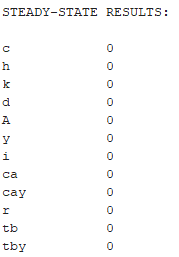

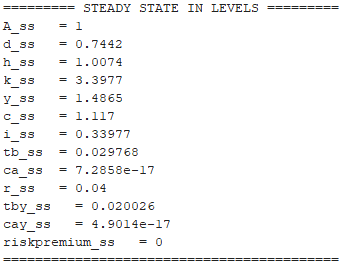

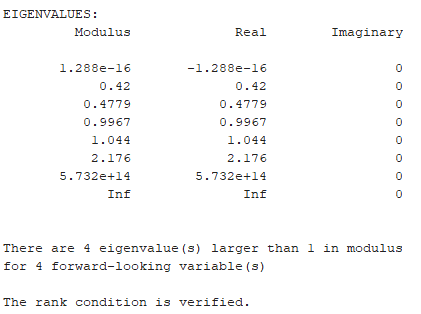

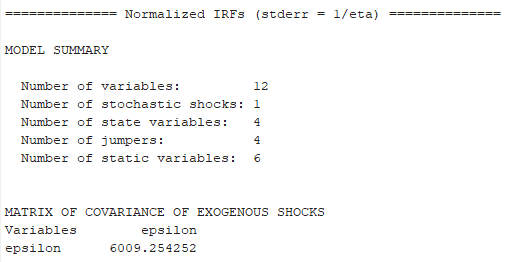

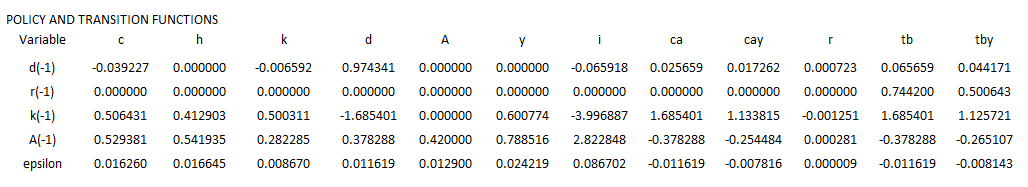

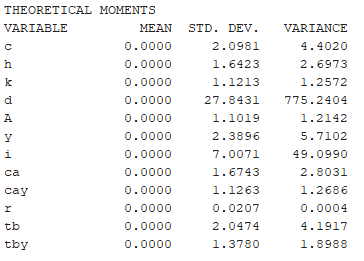

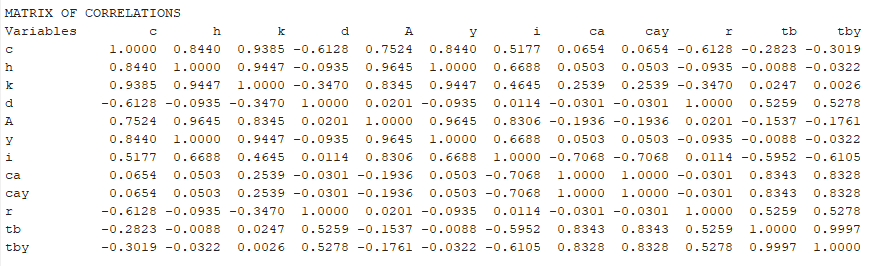

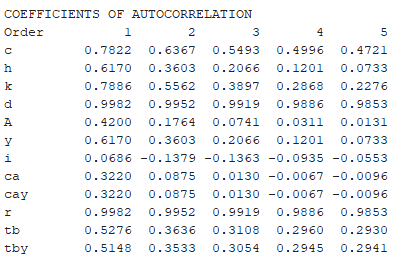

### Figure 01: Impulse-response functions

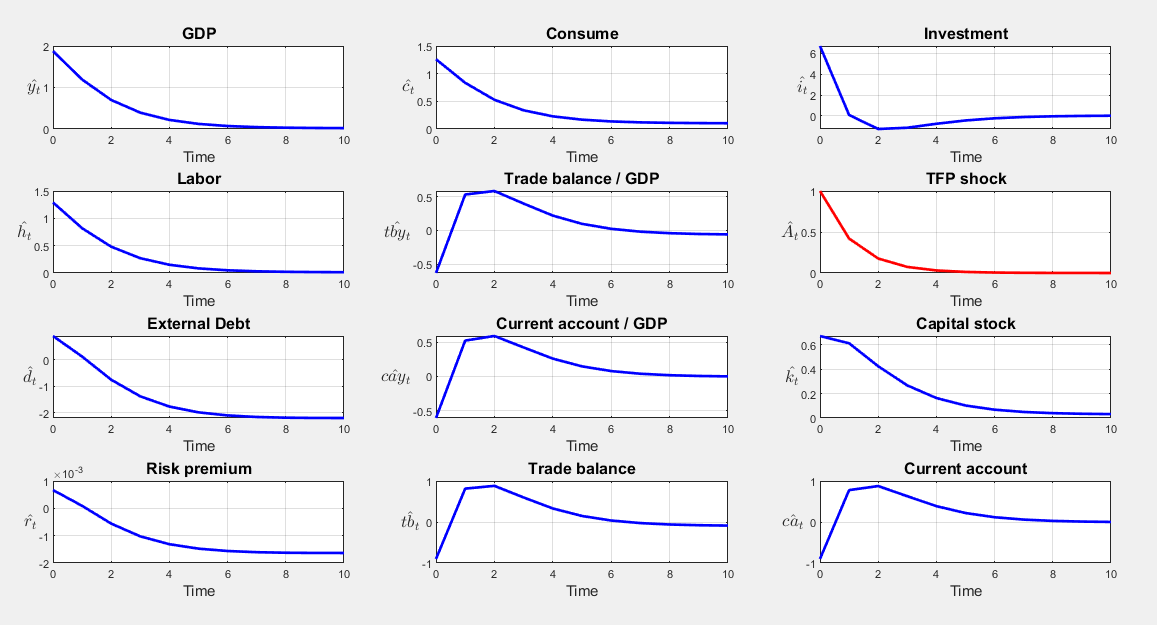

<p style="text-align: justify;"> Figure 01 presents the impulse response functions of key macroeconomic variables following a one-percent technology shock in period 0 (The red curve in the Figure 01). In this small open economy RBC framework, the positive total factor productivity (TFP) shock triggers an immediate expansion in output, consumption, investment, and hours worked. Investment reacts particularly strongly—several times larger than the output response—underscoring its central role in generating the initial deterioration of the trade-balance-to-output ratio. This deterioration occurs because the surge in domestic absorption, (i.e., the sum $c_0 + i_0$), more than offsets the contemporaneous increase in production. After its sharp jump, investment temporarily overshoots and later falls slightly below steady state, reflecting intertemporal substitution in capital accumulation. As the TFP shock gradually fades, all real variables converge back to their long-run levels, Uribe & Schmitt-Grohé (2017).</p>

<p style="text-align: justify;">The responses of external sector variables reveal the adjustment process characteristic of small open economies. The trade balance and the current account drop on impact as the economy temporarily increases borrowing from abroad to finance higher domestic absorption. Both series then reverse and rise above baseline before slowly returning to steady state, capturing the gradual correction of external imbalances. This pattern is mirrored in the trajectory of external debt: it initially becomes more negative (higher borrowing), followed by a gradual repayment phase consistent with the improving trade and current account positions.</p>

<p style="text-align: justify;">The capital stock increases smoothly and persistently due to higher investment, displaying the expected hump-shaped path typical of capital accumulation dynamics. Hours worked rise on impact and gradually fall back as the incentives created by higher marginal productivity weaken over time. The real interest rate exhibits a small and short-lived decline, reflecting intertemporal smoothing motives and the temporary nature of the shock.</p>

<p style="text-align: justify;">Altogether, the full set of IRFs illustrates the canonical propagation mechanisms of the SOE RBC model: procyclical behavior of output, consumption, investment, and labor; countercyclical responses of the trade balance and current account; and a gradual external adjustment supported by borrowing and subsequent repayment. The dynamics align with the patterns emphasized in Uribe & Schmitt-Grohé (2017).</p>


#### Outcomes from stochastic simulations under successive i.i.d. technology shocks drawn from a normal distribution

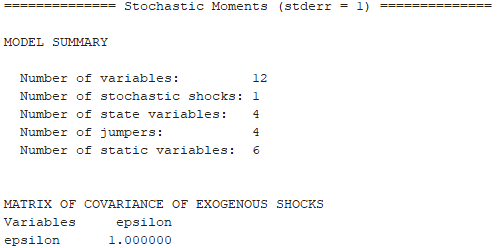

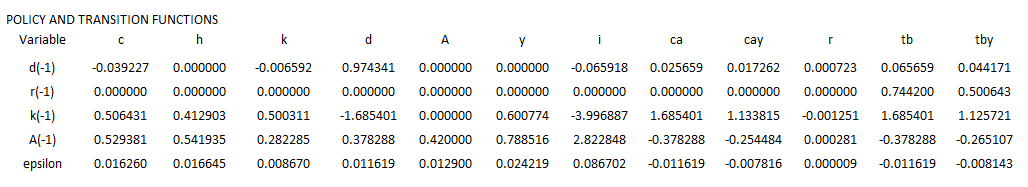

### Unconditional Second moments

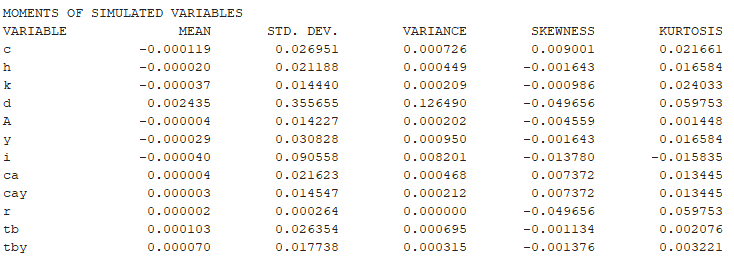

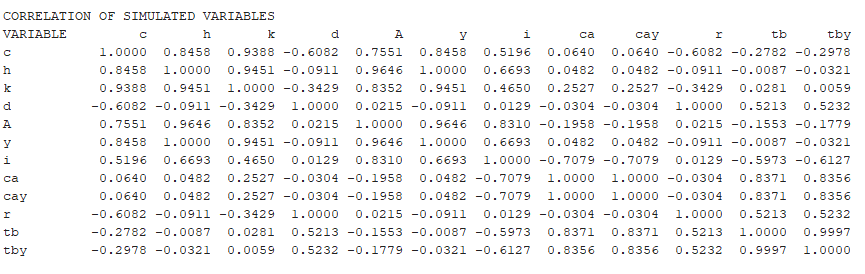

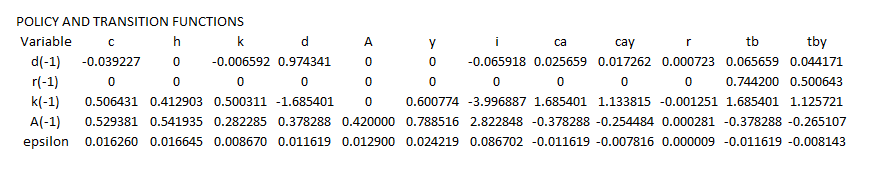

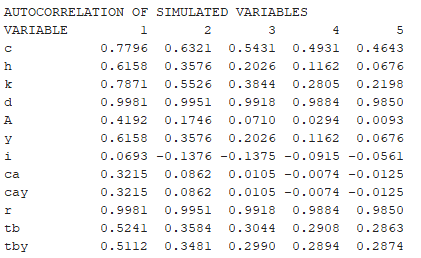

### Figure 02: Stochastic Simulations

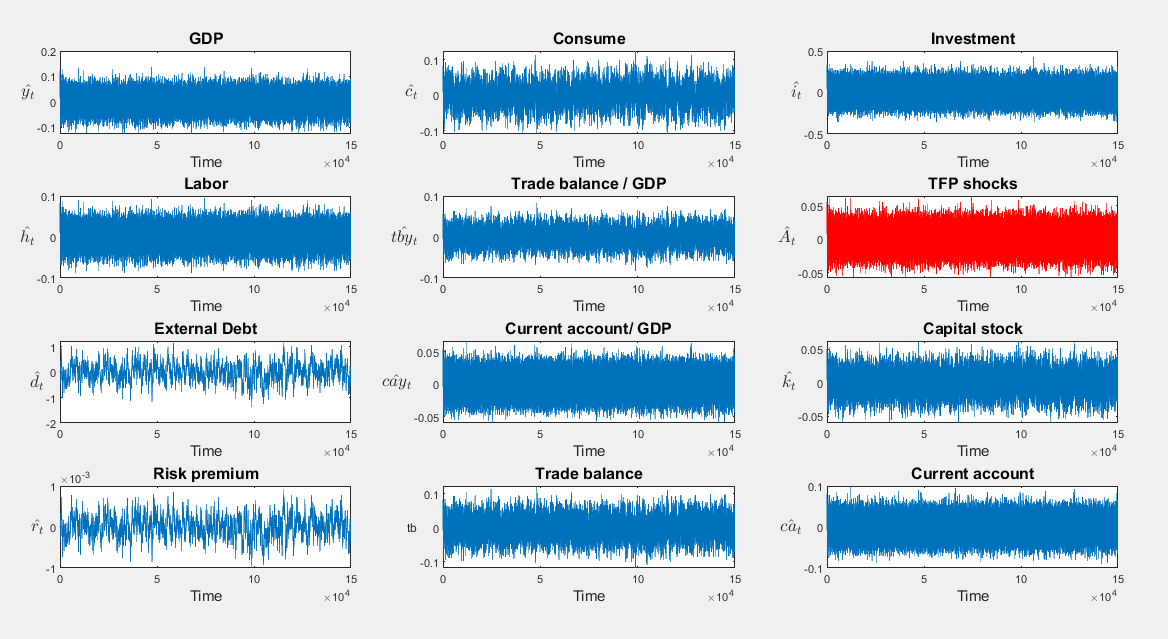

<p style="text-align: justify;">Figure 02 displays long-horizon simulated trajectories of the main macroeconomic variables of the small open economy RBC model under successive i.i.d. normally distributed technology shocks (red trajectory in the Figure 02). Unlike impulse-response functions—which trace the economy’s reaction to a single, isolated shock—these plots show the unconditional dynamics of each variable when the economy is continually hit by random disturbances every period.</p>

<p style="text-align: justify;">Overall, these long-run simulated paths illustrate how the economy behaves under continuous random disturbances: all variables remain stationary and mean-reverting, yet display volatilities and comovement patterns characteristic of the small open economy RBC framework. The figure effectively complements the impulse-response analysis by showing the time-series properties the model implies in the presence of persistent stochastic shocks.</p>

### Tble 01: Empirical and Theoretical Second Moments

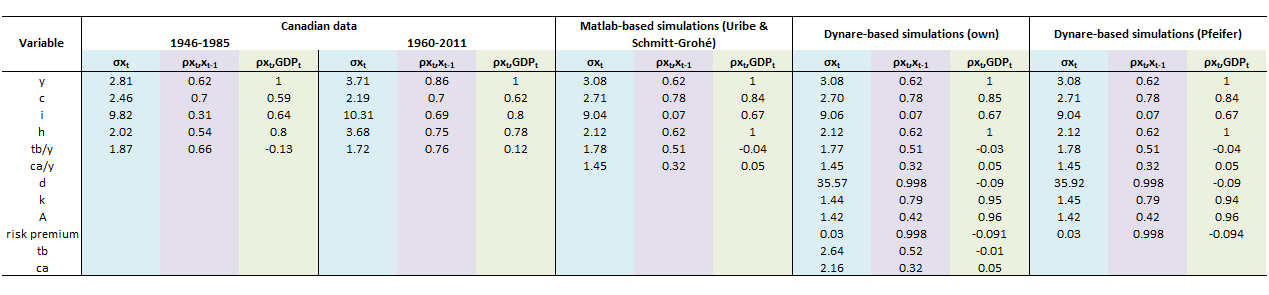

<p style="text-align: justify;">The last table compares the empirical second moments of the Canadian economy with the predictions of the real business cycle (RBC) model of a small open economy (SOE)—with an elastic interest premium on debt—by Uribe and Schmitt-Grohé (2003, 2017) and with two sets of simulated results: the Dynare implementation by Pfeifer and my own Dynare simulations.</p>

<p style="text-align: justify;">The first two empirical blocks (1946–1985 and 1960–2011) replicate the data analyzed by Uribe and Schmitt-Grohé (2017). In both samples, investment is the most volatile variable, followed by production, consumption, and hours worked, while the trade-balance-to-GDP ratio exhibits the lowest volatility. Serial correlations are positive in all aggregates, with a notable increase in the persistence of investment in the most recent sample. The trade balance is slightly countercyclical in the initial period but becomes slightly procyclical in recent years. In line with Uribe and Schmitt-Grohé (2003, 2017), the Canadian economy experienced an increase in volatility over time, especially in production and hours worked.</p>

<p style="text-align: justify;">The third block reports the second moments implied by the calibrated SOE-RBC model in Uribe and Schmitt-Grohé (2003, 2017). As expected—because several parameters were calibrated to target these empirical moments—the model closely replicates key volatilities and the serial correlation of output. It also performs reasonably well for non-targeted moments: consumption is less volatile than output but more volatile than hours and the trade balance, and the model correctly predicts a countercyclical trade balance. However, the model overstates the comovement between hours and output, generating a correlation close to one, a mechanical implication of the assumed utility specification, Uribe and Schmitt-Grohé (2017). The last two blocks—my Dynare simulations and Pfeifer's Dynare-based simulations—show that both codes reproduce almost exactly the second moments of the SOE-RBC model presented in Uribe and Schmitt-Grohé (2003, 2017).</p>

<p style="text-align: justify;">Finally, although all three implementations solve the same small-open-economy real business cycle (SOE-RBC) framework, they differ in structure, focus, and the way the linear approximation is obtained:</p>

* <p style="text-align: justify;">Uribe and Schmitt-Grohé (2017) Matlab code: defines and analyzes the small open economy model with an External Debt-Elastic Interest Rate (EDEIR) by Uribe and Schmitt-Grohé (2017). The main function, "edeir_model", creates symbolic representations of the model's endogenous variables, exogenous shocks, parameters, and 14 equilibrium conditions that describe debt evolution, output, consumption, labor supply, capital accumulation, investment, trade balance, current account, and TFP dynamics. It then computes first-order derivatives of these conditions with respect to current and future state and control variables (fx, fxp, fy, fyp) around the deterministic steady state, performs log-linearization for numerical stability, and constructs the matrix of shock impacts (ETASHOCK) and its variance-covariance. The function outputs a file (edeir_model_num_eval.m) containing these derivatives for numerical evaluation. Additional scripts, "edeir_run.m" and "edeir_ss.m", compute the steady state, evaluate the derivatives at this steady state, derive first-order policy functions (gx, hx), calculate second moments, correlations, and serial correlations of key variables, and generate impulse-response functions for shocks such as TFP innovations, plotting the dynamic responses of output, consumption, investment, labor, trade balance, and TFP. Overall, the code symbolically linearizes the EDEIR model, prepares it for numerical solution, and computes both theoretical and empirical model statistics.

* <p style="text-align: justify;">Pfeifer’s Dynare implementation expresses the model in nonlinear levels, using exponentials and explicit steady-state definitions. Dynare computes the steady state analytically whenever possible and numerically otherwise, and then applies an automatic first-order Taylor linearization via "stoch_simul(order=1)". The code also checks residuals and performs a first-order stochastic simulation to compute standard deviations, autocorrelations, and correlations of key macroeconomic variables, presenting the results in a table format. Finally, it generates impulse response functions (IRFs) to a TFP shock over 10 periods for visualization and analysis. Pfeifer’s code is modular and designed to handle multiple model configurations, not just the specific version with an external debt-elastic interest-rate premium.</p> 

* <p style="text-align: justify;">My Dynare implementation: focuses exclusively on replicating the SOE-RBC model of Uribe and Schmitt-Grohé with a debt-elastic interest rate premium. The system is supplied already in log-linearized form, with steady-state definitions included. Although it also uses stoch_simul(order=1), the difference is that Dynare works on the analytically linearized system, rather than performing a numerical linearization of a nonlinear model. Likewise, my code performs both IRF analysis and very long stochastic simulations (150,000 periods) under i.i.d. TFP shocks, visualizing trajectories of all variables over time.</p
                                                                                 
<p style="text-align: justify;">Despite these differences, all three implementations produce almost identical second moments, serial correlations, and cyclical correlations, confirming the robustness of the SOE-RBC model’s first-order solution and Dynare’s reliability in computing it.</p>

# Summary of ideas


<p style="text-align: justify;">The notebook develops and replicates the Small Open Economy Real Business Cycle (SOE-RBC) model following the framework of Uribe & Schmitt-Grohé. It begins by presenting the model’s structural assumptions—household preferences, firm technology, international financial markets, and the capital-accumulation equation—before deriving the full set of equilibrium conditions. The steady state is computed analytically and checked for consistency, after which the system is log-linearized around this steady state to obtain a reduced-form representation suitable for numerical solution. All parameter values used in the notebook correspond exactly to those reported in Uribe & Schmitt-Grohé (2003) and in their 2017 textbook, ensuring direct comparability to the original quantitative results.</p>

<p style="text-align: justify;">After solving the linear rational-expectations system and obtaining the policy matrices, the notebook shows impulse-response functions to a temporary productivity disturbance, illustrating the dynamic responses of consumption, output, labor, investment, capital, esternal debt, the current account, the risk premium, the trade-balance-to-output ratio, the current-account-to-output ratio, and the trade balance. Stochastic simulations under successive i.i.d. technological shocks with a normal distribution are also presented, showing the raw dynamic behavior of all variables without any Hodrick–Prescott filter. The workflow, from structural formulation to IRFs and stochastic simulations, aims to closely replicate the numerical findings reported by Uribe & Schmitt-Grohé in both their 2003 paper and their 2017 book.</p>

# Bibliographic references

<p style="text-align: justify;">Lubik, T. A. (2007). Non-stationarity and instability in small open economy models even when they are “closed”. Economic Quarterly, 93(4), 393–412. Federal Reserve Bank of Richmond.</p>

Pfeifer, J. (n.d.). SGU_2003.mod [Computer code]. GitHub. Retrieved December 9, 2025, from https://github.com/JohannesPfeifer/DSGE_mod/blob/master/SGU_2003/SGU_2003.mod

<p style="text-align: justify;">Uhlig, H. (1999): A Toolkit for Analyzing Nonlinear Dynamic Stochastic Models Easily, in Computational
Methods for the Study of Dynamic Economies, ed. By Marimon, and Scott, pp. 30-61. Oxford University Press.</p>

<p style="text-align: justify;">Uribe, M. & Schmitt-Grohé, S. (2003). Closing small open economy models. Journal of International Economics, 61, 163–185.</p>

<p style="text-align: justify;">
Uribe, M., & Schmitt-Grohé, S. (2017). <i>Open economy macroeconomics</i>. Princeton University Press.
</p>
